<center><h1>Edge Detection</h1><h5>by Rebecca Hinrichs</h5><h5>∙ a discussion with examples ∙</h5><h5>FALL 2023</h5></center>

--- 
---

--- 

<center>How can we detect edges using Fourier Transform?

<hr style="width: 50%; border-color: black;"></center><br>

```
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Generate a 2D sine wave image
x = np.arange(256)                                                                        # 1D sine wave
y = np.sin(2 * np.pi * x/3)                                                               # <-- to control the frequency
y += max(y)                                                             # offset sine wave by max value to avoid negativity of sine
img1 = np.array([[y[j]*127 for j in range(256)] for i in range(256)], dtype=np.uint8)     # image creation
img2 = np.rot90(img)                                                                      # rotate by 90-degrees

# Generate another 2D sine wave image
img3 = cv2.imread("image.jpg", 0)

# Generate a Fourier Frequency Transformation (FFT) of the image
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)                              # Discrete Fourier Transform of our image
dft_shift = np.fft.fftshift(dft)                                                          # to center our output
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])) +1)  # real, complex, +1 to avoid 0-div
fig, ax = plt.subplots(1,2, figsize=(12,12))                                              # demonstrate
ax[0].imshow(img)
ax[0].set_title("Input Image")
ax[1].imshow(magnitude_spectrum)
ax[1].set_title("FFT of Image")
plt.show();
```
<center><hr style="width: 50%; border-color: black;"></center><br>

The Fourier Frequency Transformation (FFT) is a method of discretizing a wave's phase cycle (the frequency of the spatial wave in its relation to time). In relation to images, it takes the summation (to make discrete points- we know from Calculus that the Riemann Sum is effectively the discretization of the Integral used for continuous points) of the signal function and multiplies it by an exponentiated complex coefficient (the video calls this "j"). In our code, this coefficient "j" is represented in the `magnitude_spectrum` formula as $20 * \text{log}(x(n))$. The function from `open-CV` which creates the Riemann Sum discretization of the wave is `cv2.dft` which requires the image to be passed as a `np.float32` object. The flag we presented `cv2.DFT_COMPLEX_OUTPUT` allows us to output both a real and complex output- corresponding to 2 channels in our output array. The amplitude is calculated using the `magnitude_spectrum` using both real and complex channels. We had to add a $+1$ to the logarithm calculation in order to avoid computation problems for precision (specifically, vanishing gradient). Finally, we centered the output using NumPy's `fftshift` function. This allows us to see- in our output plot- the behavior of the frequency in the image.

As spatial frequency increases (the bars get closer in the original image), the peaks in the FFT get farther away. So the higher the frequency = the farther away the peaks are in the FFT output. The FFT image reflects the information in the Input Image. The middle represents the low frequency and the corners reflect the high frequency because we did the centering (called dft_shift); if we hadn't centered our DFT output, we'd have the inverse reflected in the FFT image.

Essentially, we are able to reconstruct a digital signal by discretizing the input sinusoidal wave and reconstructing those points <i>between</i> the discretized points to simulate a continuous signal. This is done essentially by taking the difference between each discretized point and filling the gaps with simulated frequency. This is how noise reduction, smoothing, and edge detection can be achieved using the Laplacian of Gaussian technique.

To accomplish edge detection: we can use this technique to mask the high frequency areas- the edges of the image- which have the sharpest (most abrupt) change in frequency, identified by the FFT image as the bright points central to the output, in our examples below. These are called <b>band-pass filters</b> because we're allowing certain bands through and restricting others. Isn't this so freaking cool?!

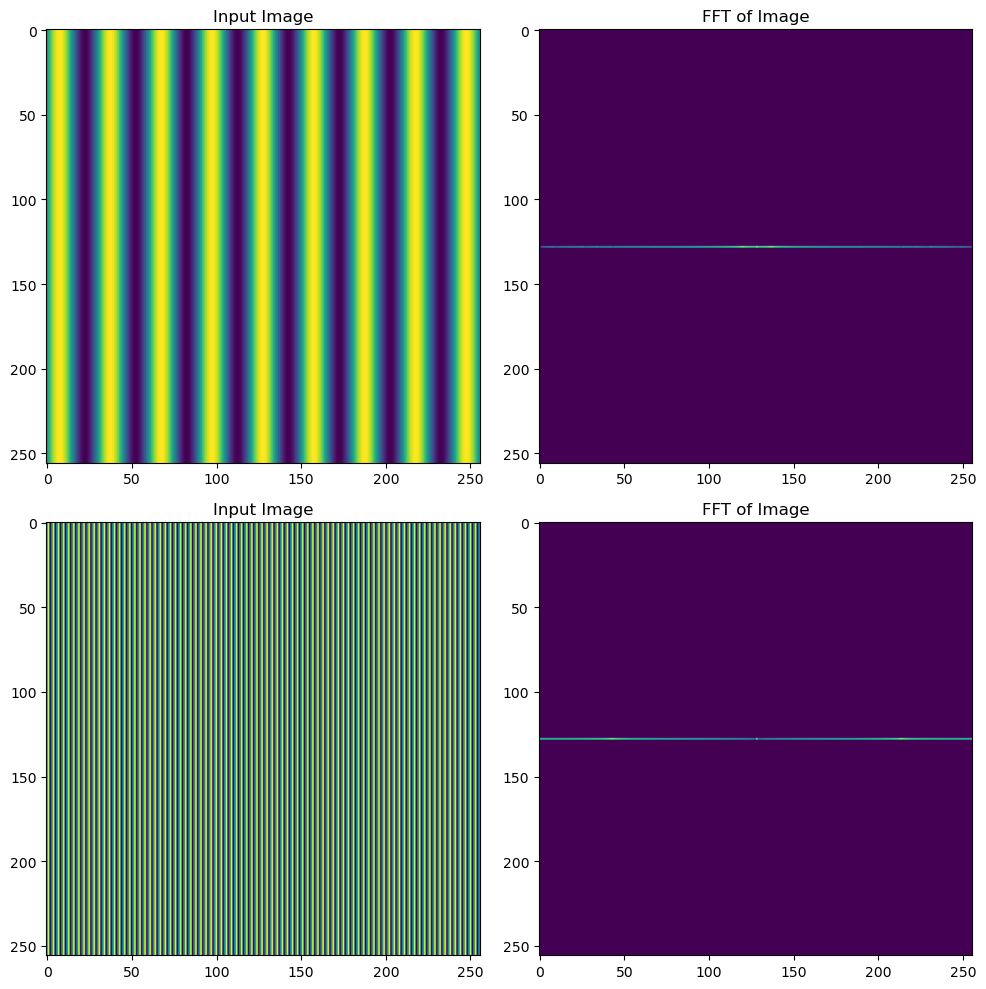

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Generate a 2D sine wave image
x = np.arange(256)  # 1D sine wave
y1 = np.sin(2 * np.pi * x/30) # <-- to control the frequency
y1 += max(y1) # offset sine wave by max value to avoid negativity of sine
imgA = np.array([[y1[j]*127 for j in range(256)] for i in range(256)], dtype=np.uint8) # image creation
y2 = np.sin(2 * np.pi * x/3) # <-- to control the frequency
y2 += max(y2) # offset sine wave by max value to avoid negativity of sine
imgB = np.array([[y2[j]*127 for j in range(256)] for i in range(256)], dtype=np.uint8) # image creation

# Generate a Fourier Frequency Transformation (FFT) of the image
dftA = cv2.dft(np.float32(imgA), flags=cv2.DFT_COMPLEX_OUTPUT)  # Discrete Fourier Transform of the image
dftA_shift = np.fft.fftshift(dftA)  # to center our output
magnitude_spectrumA = 20 * np.log((cv2.magnitude(dftA_shift[:,:,0], dftA_shift[:,:,1])) +1)  # real, complex, +1 to avoid 0-div
dftB = cv2.dft(np.float32(imgB), flags=cv2.DFT_COMPLEX_OUTPUT)  # Discrete Fourier Transform of the image
dftB_shift = np.fft.fftshift(dftB)  # to center our output
magnitude_spectrumB = 20 * np.log((cv2.magnitude(dftB_shift[:,:,0], dftB_shift[:,:,1])) +1)  # real, complex, +1 to avoid 0-div

# Demonstrate FFT images
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].imshow(imgA)
ax[0,0].set_title("Input Image")
ax[0,1].imshow(magnitude_spectrumA)
ax[0,1].set_title("FFT of Image")
ax[1,0].imshow(imgB)
ax[1,0].set_title("Input Image")
ax[1,1].imshow(magnitude_spectrumB)
ax[1,1].set_title("FFT of Image")
plt.tight_layout()
plt.show();

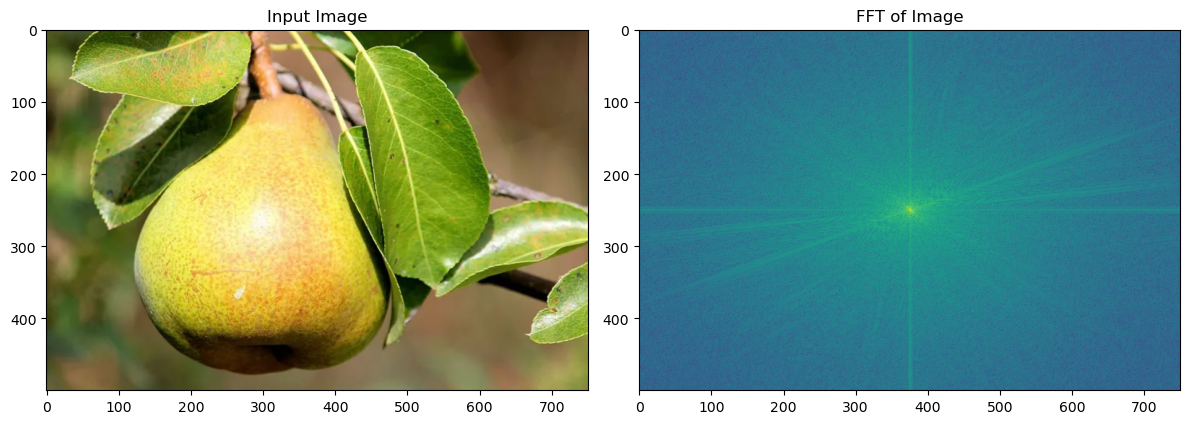

In [2]:
# Generate another 2D sine wave from an image file
img = cv2.imread("image.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Generate a Fourier Frequency Transformation (FFT) of the image
dft = cv2.dft(np.float32(img_gray), flags=cv2.DFT_COMPLEX_OUTPUT)  # Discrete Fourier Transform of the image
dft_shift = np.fft.fftshift(dft)  # to center our output
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])) +1)  # real, complex, +1 to avoid 0-div
fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(np.array(img_rgb))
ax[0].set_title("Input Image")
ax[1].imshow(magnitude_spectrum)
ax[1].set_title("FFT of Image")
plt.tight_layout()
plt.show();

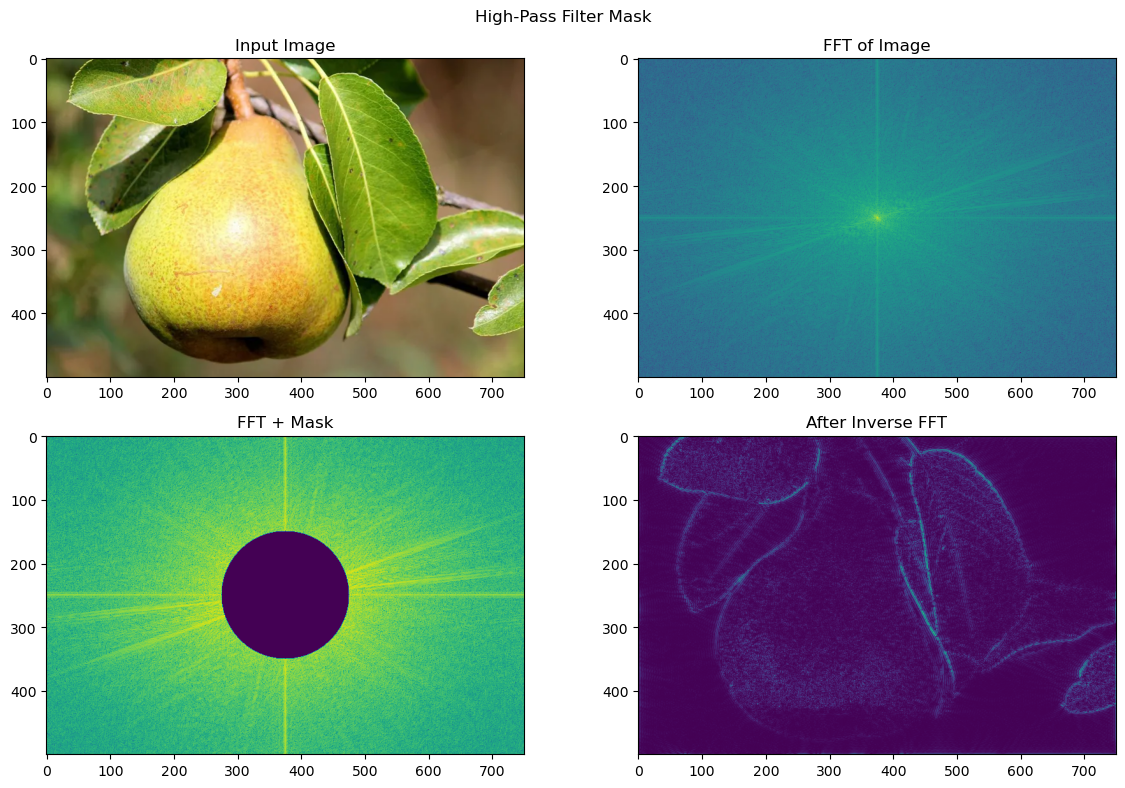

In [3]:
# Generate one last 2D sine wave from an image file
img = cv2.imread("image.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Generate a Fourier Frequency Transformation (FFT) of the image
dft = cv2.dft(np.float32(img_gray), flags=cv2.DFT_COMPLEX_OUTPUT)  # Discrete Fourier Transform of the image
dft_shift = np.fft.fftshift(dft)  # to center our output
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))  # real, complex

# Create a high-pass filter mask (HPF); block high freqencies in the image (the edges)
rows,cols = img_gray.shape
ctr_row,ctr_col = int(rows/2),int(cols/2)  # center pixel
mask = np.ones((rows,cols,2), np.uint8)  # create a mask of 1's in 2 channels (real,complex)
r = 100  # number of pixels per radius for a circular mask <---- we can increase or decrease this for specificity
center = [ctr_row, ctr_col]
x,y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r  # equation of a circle
mask[mask_area] = 0  # where mask_area is true, replace the 1's with 0's
fshift = dft_shift * mask  # keep all 1's as-is with photo's pixel value; else, values are 0
fshift_mask_mag = 2000 * np.log((cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))+1)  # technically unnecessary, *100 to magnify
fi_shift = np.fft.ifftshift(fshift)  # inverse shift, to unshift centered shift from dft_shift
img_back = cv2.idft(fi_shift)  # Inverse Discrete Fourier Transform
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

# Demonstrate the mask
fig, ax = plt.subplots(2,2, figsize=(12,8))
ax[0,0].imshow(img_rgb)
ax[0,0].set_title("Input Image")
ax[0,1].imshow(magnitude_spectrum)
ax[0,1].set_title("FFT of Image")
ax[1,0].imshow(fshift_mask_mag)
ax[1,0].set_title("FFT + Mask")
ax[1,1].imshow(img_back)
ax[1,1].set_title("After Inverse FFT")
fig.suptitle("High-Pass Filter Mask")
plt.tight_layout()
plt.show();

<center><h2>We made an Edge Detector!</h2></center>

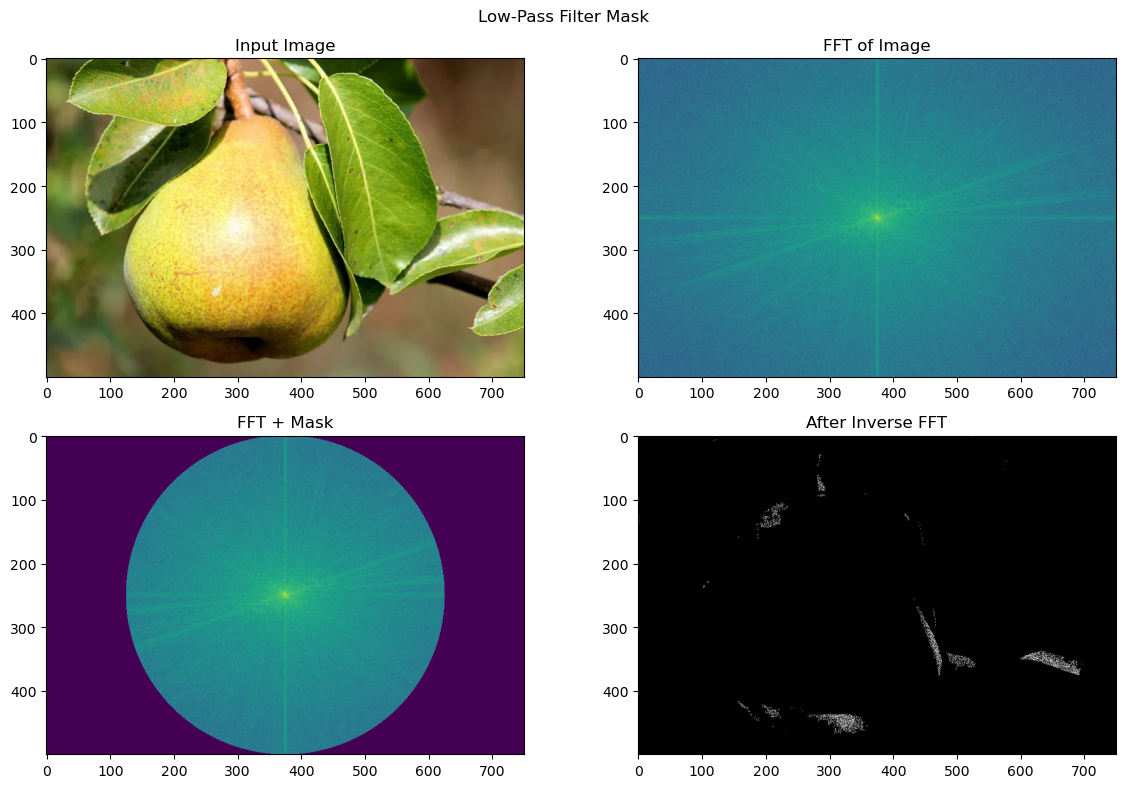

In [4]:
# Generate one last 2D sine wave from an image file
img = cv2.imread("image.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Generate a Fourier Frequency Transformation (FFT) of the image
dft = cv2.dft(np.float32(img_gray), flags=cv2.DFT_COMPLEX_OUTPUT)  # Discrete Fourier Transform of the image
dft_shift = np.fft.fftshift(dft)  # to center our output of high frequencies
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))  # real, complex

# Create a low-pass filter mask (LPF); block low freqencies in the image (the glare)
rows,cols = img_gray.shape
ctr_row,ctr_col = int(rows/2),int(cols/2)  # center pixel
mask = np.zeros((rows,cols,2), np.uint8)  # create a mask of 0's in 2 channels (real,complex) <<-- LPF
r = 250  # number of pixels per radius for a circular mask <---- we can increase or decrease this for specificity
center = [ctr_row, ctr_col]
x,y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= r*r  # equation of a circle
mask[mask_area] = 1  # where mask_area is true, replace the 0's with 1's <<-- LPF
fshift = dft_shift * mask  # keep all 0's as-is with photo's pixel value; else, values are 1 <<-- LPF
fshift_mask_mag = 2000 * np.log((cv2.magnitude(fshift[:,:,0], fshift[:,:,1]))+1)  # technically unnecessary, *100 to magnify
fi_shift = np.fft.ifftshift(fshift)  # inverse shift, to unshift centered shift from dft_shift
img_back = cv2.idft(fi_shift)  # Inverse Discrete Fourier Transform
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])
img_back = cv2.cvtColor((img_back*255).astype(np.uint8), cv2.COLOR_BGR2RGB)

# Demonstrate the mask
fig, ax = plt.subplots(2,2, figsize=(12,8))
ax[0,0].imshow(img_rgb)
ax[0,0].set_title("Input Image")
ax[0,1].imshow(magnitude_spectrum)
ax[0,1].set_title("FFT of Image")
ax[1,0].imshow(fshift_mask_mag)
ax[1,0].set_title("FFT + Mask")
ax[1,1].imshow(img_back)
ax[1,1].set_title("After Inverse FFT")
fig.suptitle("Low-Pass Filter Mask") # <<-- LPF
plt.tight_layout()
plt.show();

<center><h2>We made a Shadow Detector!</h2></center>

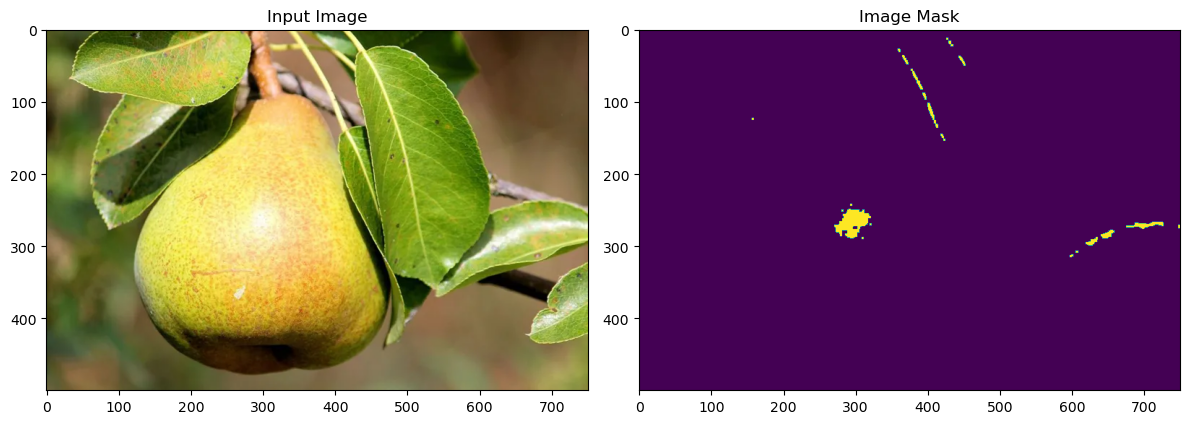

In [5]:
# Generate another 2D sine wave from an image file
img = cv2.imread("image.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Establish a threshold to create a filter for the glare
threshold = 240  # <--- intensity threshold
kernel_size = (3,3)  # <--- kernel window size
ret, threshold_mask = cv2.threshold(img_gray, threshold, 256, cv2.THRESH_BINARY)
kernel = np.ones(kernel_size, np.uint8)
detect_mask = cv2.morphologyEx(threshold_mask, cv2.MORPH_OPEN, kernel)
img_mask = cv2.morphologyEx(detect_mask, cv2.MORPH_CLOSE, kernel) 

# Demonstrate the image mask
dft = cv2.dft(np.float32(img_gray), flags=cv2.DFT_COMPLEX_OUTPUT)  # Discrete Fourier Transform of the image
dft_shift = np.fft.fftshift(dft)  # to center our output
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])) +1)  # real, complex, +1 to avoid 0-div
fig, ax = plt.subplots(1,2, figsize=(12,12))
ax[0].imshow(np.array(img_rgb))
ax[0].set_title("Input Image")
ax[1].imshow(img_mask)
ax[1].set_title("Image Mask")
plt.tight_layout()
plt.show();

<center><h2>We made a Highlight Detector!</h2></center>

<br>

--- 

<center><i>How freaking cool is that!</i>

<hr style="width: 50%; border-color: black;"></center><br>